In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
# Defining font sizes
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

**The Normal Equation**

In [5]:
# generating linear data to test a linear equation
import numpy as np
np.random.seed(42)    #to make this code example reproducible
m = 100 # no of instances
X = 2 * np.random.rand(m, 1)    # column vector
y = 4 + 3 * X + np.random.rand(m, 1)    # Column vector

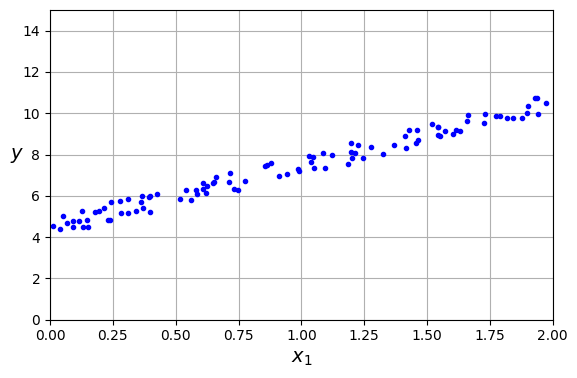

In [6]:
# Plotting figure
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

In [7]:
len(X)

100

In [8]:
# Computing inverse using np.linalg
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)    # add X(0) = 1 to each feature
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [9]:
theta_best


array([[4.51359766],
       [2.98323418]])

In [10]:
# Using the new normal parameter making prediction
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add X0 = 1 to each instance
y_predict = X_new_b @ theta_best

In [11]:
y_predict

array([[ 4.51359766],
       [10.48006601]])

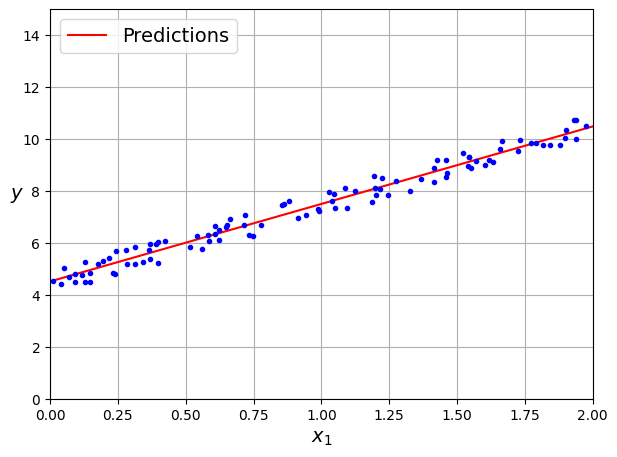

In [12]:
# plotting above results
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

In [14]:
# Performing linear Regression using Sci-kit Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [15]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])